Cooling of hydrogen Fuel Cell

   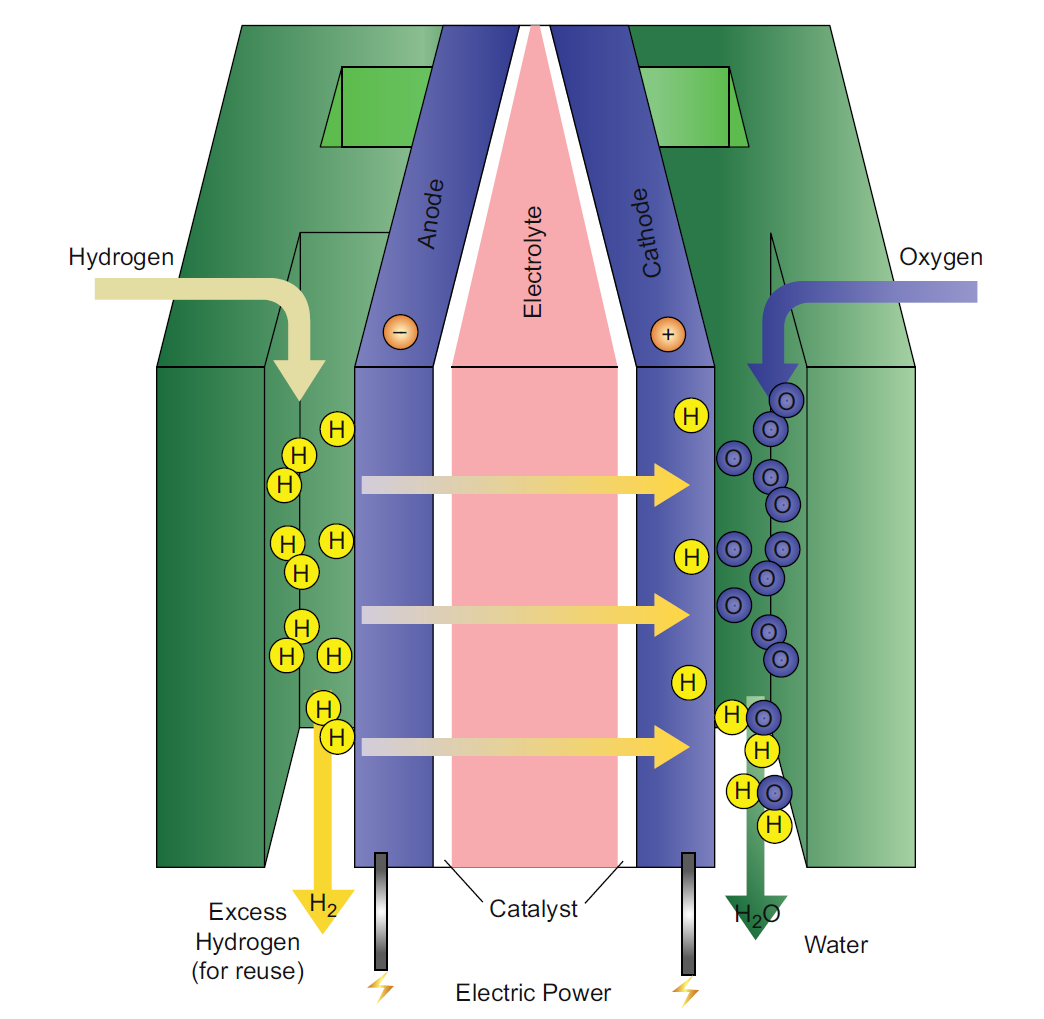     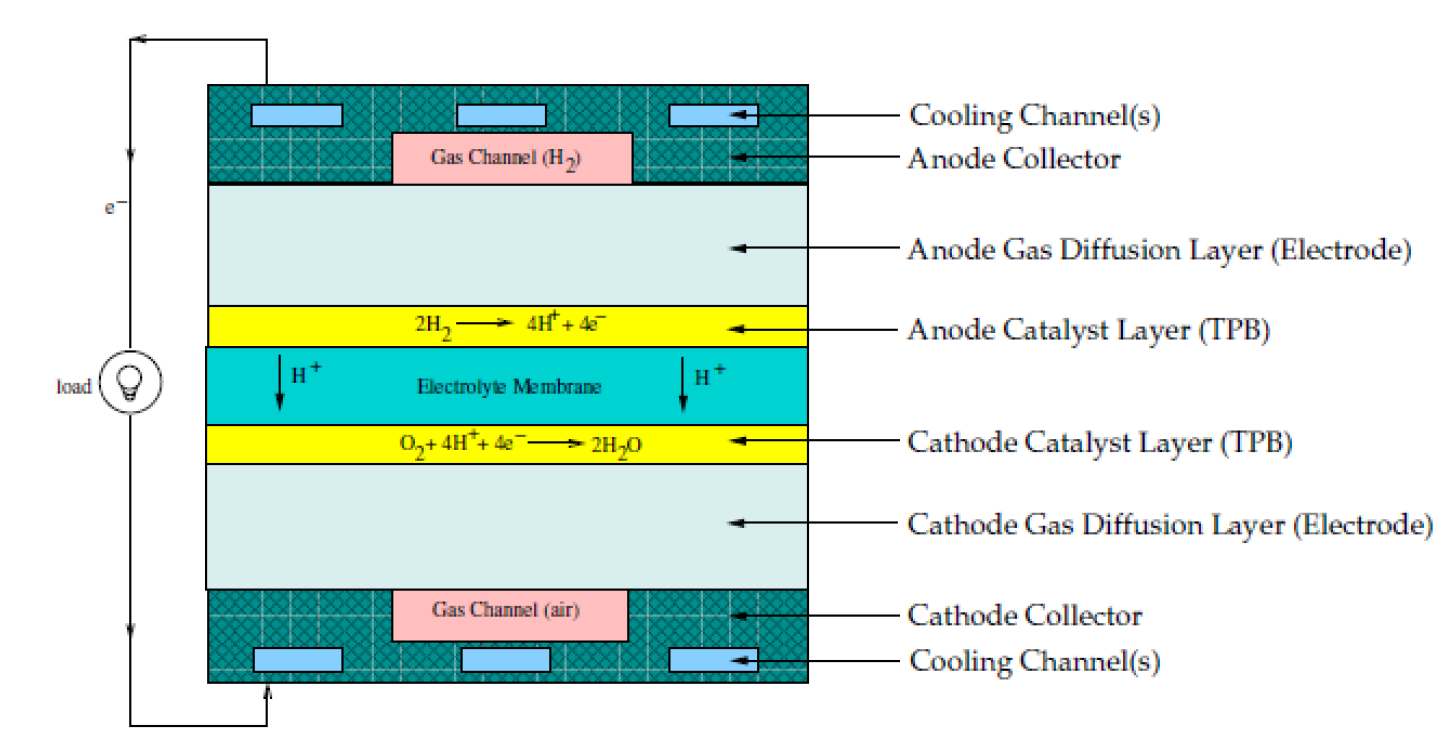

                                            Figure 1: Principle sketchs of a PEMFC.
Fig.1 shows a principle sketch of the so-called proton exchange membrane fuel cell (a.k.a. polymer electrolyte membrane fuel cell,
PEMFC) in which the electrolyte is a polymer. The hydrogen is supplied
on the anode side and it tries to reach the oxygen on the cathode side. In
doing so, it achieves assistance from a catalytic material such as platinum.
On the catalytic material the hydrogen atoms are split up into protons and
electrons, which find different ways to join with the oxygen. The protons
cross the electrolyte, whereas the electrons need to take a way through the
electric circuit to reach the cathode. In the process, electricity and heat are
generated. As the protons are joining with the oxygen, water is created.
The noble metal platinum is a key factor in PEMFCs and it is regarded as a
stable catalyst. However, it is a limited resource and research work is underway
to find a substitute for it.

1. Charge and Water Transport:
   
    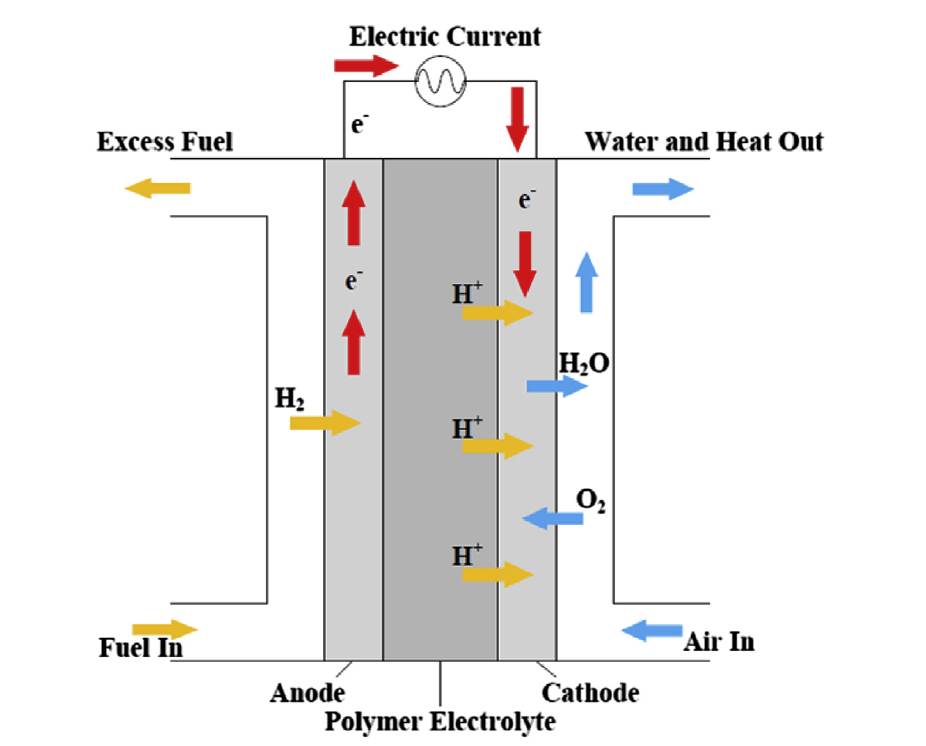

                                  Figure 2: Fluid flow and heat and mass transfer in a fuel cell of three layers.

Electrons and ions are produced and consumed in two electrochemical
reactions at the anodeeelectrolyte and cathodeeelectrolyte interfaces. The
electrons are transported through the el and interconnect to the external
electric circuit. Ions are transported through the electrolyte from the electrode where they are produced to the electrode where they are
consumed. Ohmic voltage losses are caused by the resistances to the motion
of ions through the electrolyte as well as that of electrons through the
electrodes, interconnect materials, and contact interfaces. Ion transport is
also important for the transport of water in PEMFCs.

   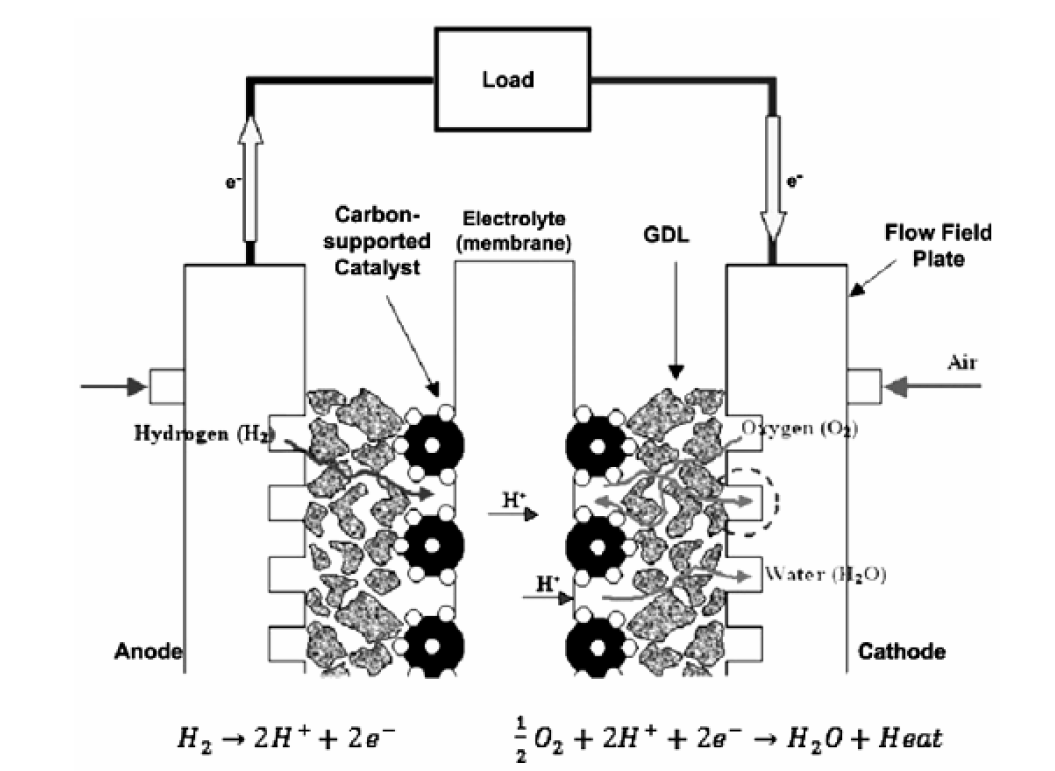

                                  Figure 3: A polymer electrolyte fuel cell
A typical PEM fuel cell has a relatively high power generation efficiency but less higher than 40%; this means that more than the 50% is waste heat, that must be discharged efficiently from the fuel cell to protect the membrane. This level increases in case of stacks composed by a quite high number of fuel
cells connected in series, as required in conventional power applications. Cooling method depends mainly by the size of fuel cell and by the operating temperature for optimum performance that is in general in the range of 60–80 °C. This range is mainly dictated by the properties of the membrane. 
The relatively small temperature difference between the fuel stack and the environment renders thermal management a quite difficult issue. 
PEM Fuel Cells have relatively large active area and thermal management is required not only to maintain a proper operating temperature but also to manage the temperature distribution [2-3]. It is crucial to properly control the temperature and the humidity of the PEM fuel cell to take full advantage of its high efficiency so that hydration of the membrane has to be combined with cooling system operation. The quite low operating temperature, that is necessary to maintain the perspective of reaching very high efficiency levels, requires increased space to package the thermal management system as well as higher performance of the cooling system. It is common opinion that one of the technical challenges of the fuel cell stack for high-performance applications is the thermal management. Fuel cell technology will be increased significantly through maximization of the heat transfer and by innovative heat transfer schemes.

Convective Cooling:

Consider the fuel cell stack shown in Fig. 3. Larminie and Dicks (2003) state that fuel cells with P > 100W require air cooling. To avoid drying out the membrane, separate reactant air and cooling air are required. This is achieved by placing cooling channels within the bipolar plate. A schematic of one cell with such a cooling channel is shown in Fig. 4. We assign the following variables, from the perspective taken from a side view of the fuel cell: L is the height of the plate and channel; d is the depth of the plate and channel (so the product Ld is the area Acell), t is the thickness of the bipolar plate, cathode, electrolyte, and anode; and w is the width of the cooling channel.


   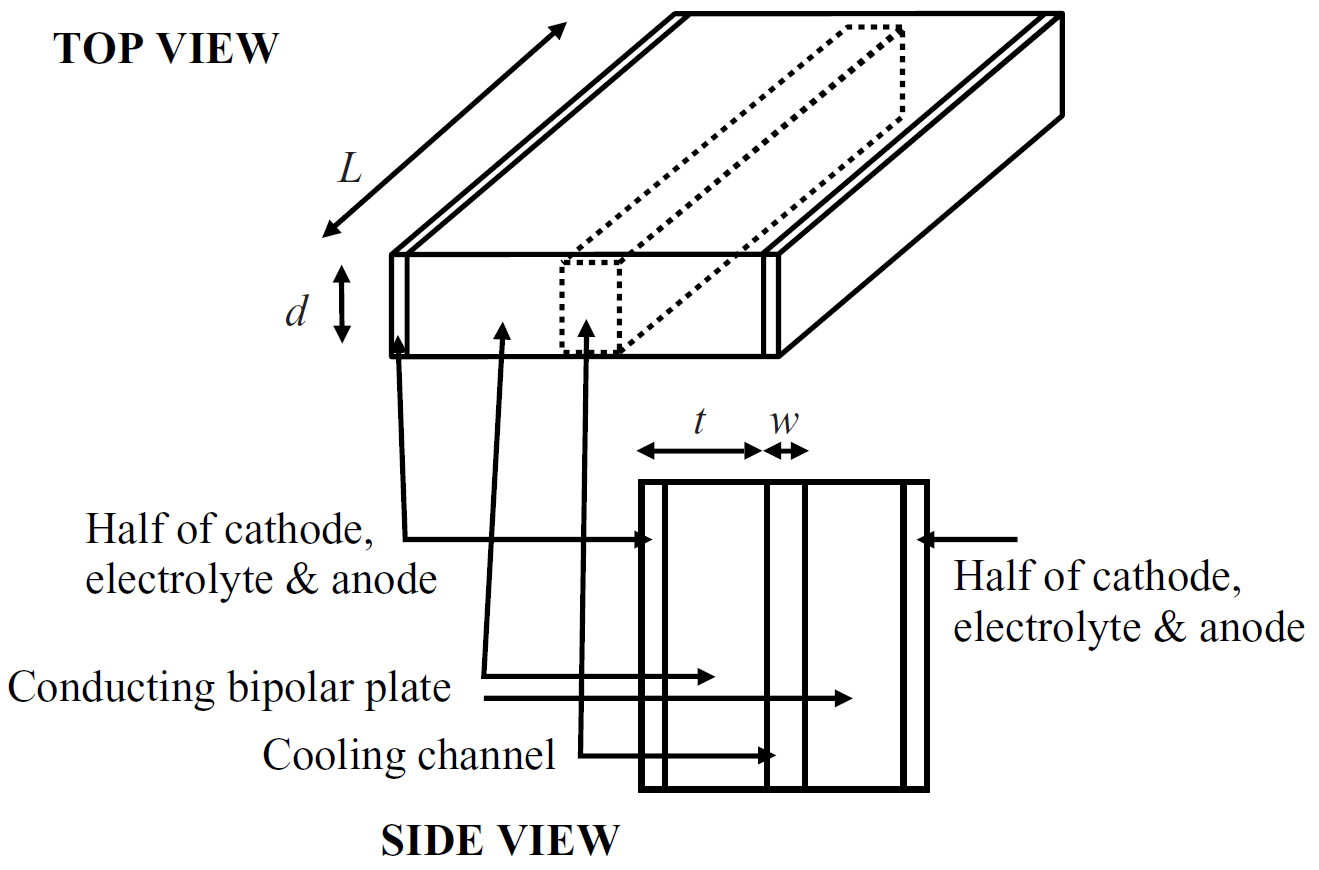
   
                                Figure 4: Single cell with cooling channel.

   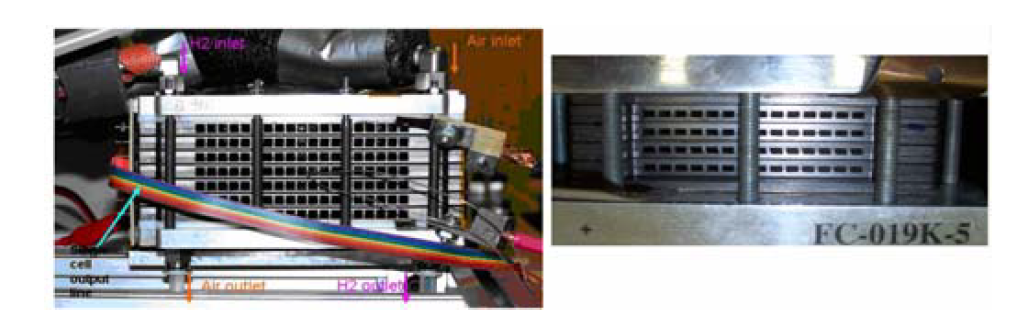

                               Figure 5: Examples of thermal control of fuel cell stacks with separated airflow


Steady-State Calculations:

In [10]:
import math

# Constants
F = 96485  # Faraday's constant, C/mol
H_higher = 285.8  # Heat of formation (higher heating value), kJ/mol
k_solid = 20  # Thermal conductivity of the solid material, W/m-K
k_gas = 0.0263  # Thermal conductivity of the gas, W/m-K
mu_gas = 1.84e-4  # Viscosity of the gas, g/cm-s
Cp = 1.0  # Specific heat capacity of the gas, J/g-K

# Fuel cell parameters
n_cells = 5  # Number of cells in the stack
A_cell = 10  # Cross-sectional area of a cell, cm^2
i_density = 500  # Current density, mA/cm^2

# Polarization equation parameters
E_oc = 1.031  # Open-circuit voltage, V
A = 0.03  # V
r = 2.45e-4  # Ohmic resistance, kΩ cm^2
m = 2.11e-5  # V
n = 8e-3  # cm^2/mA

# Geometric dimensions (in meters)
L = 0.0316  # Height of the plate and channel
d = 0.0316  # Depth of the plate and channel
t = 0.005  # Thickness of the bipolar plate, cathode, electrolyte, and anode
w = 0.001  # Width of the cooling channel

# Convert units for calculations
A_cell_m2 = A_cell / 1e4  # cm^2 to m^2
i_density_A_m2 = i_density * 10  # mA/cm^2 to A/m^2

# Calculate cell voltage using the polarization equation
#E_cell = E_oc - A * math.log(i_density_A_m2) - i_density_A_m2 * r - m * math.exp(n * i_density_A_m2)
E_cell =0.72 # V
# Calculate stack voltage and current
E_stack = n_cells * E_cell
I = i_density * A_cell / 1000  # mA to A

# Calculate power output
P = I * E_stack  # W

# Calculate hydrogen molar flow rate per cell
M_fuel_cell = I / (2 * F)  # mol/s
M_fuel_stack = M_fuel_cell * n_cells  # mol/s

# Calculate efficiency
efficiency = E_cell / 1.48

# Calculate heat generation
Q = P * (1 / efficiency - 1)  # W
Q_cell = Q / n_cells  # W

# Cooling system design
P_channel = 2 * d + 2 * w  # Perimeter of the cooling channel, m
D_h = 4 * d * w / P_channel  # Hydraulic diameter, m
Nu = 8.23  # Nusselt number for high aspect ratio
h = Nu * k_gas / D_h  # Heat transfer coefficient, W/m^2-K

# Maximum temperature within the fuel cell
T_edge = 60  # Edge temperature, °C
T_surface = T_edge - Q_cell / (L * P_channel) * t / k_solid  # °C
T_gas_exit = T_surface - Q_cell / (h * L * P_channel)  # °C

# Required air mass flow rate
T_gas_in = 20  # Inlet cooling air temperature, °C
m_dot_coolant = Q_cell / (Cp * (T_gas_exit - T_gas_in))  # g/s

# Reynolds number
Re = 4 * m_dot_coolant / (mu_gas * P_channel * 100)  

# Print results
print(f"Cell Voltage (E_cell): {E_cell:.2f} V")
print(f"Stack Voltage (E_stack): {E_stack:.2f} V")
print(f"Current (I): {I:.2f} A")
print(f"Power (P): {P:.2f} W")
print(f"Hydrogen Molar Flow Rate per Cell (M_fuel_cell): {M_fuel_cell:.2e} mol/s")
print(f"Hydrogen Molar Flow Rate for Stack (M_fuel_stack): {M_fuel_stack:.2e} mol/s")
print(f"Efficiency: {efficiency:.2f}")
print(f"Heat Generation (Q): {Q:.2f} W")
print(f"Heat Generation per Cell (Q_cell): {Q_cell:.2f} W")
print(f"Surface Temperature (T_surface): {T_surface:.2f} °C")
print(f"Exit Gas Temperature (T_gas_exit): {T_gas_exit:.2f} °C")
print(f"Required Cooling Air Mass Flow Rate per Cell (m_dot_coolant): {m_dot_coolant:.2f} g/s")
print(f"Total Required Cooling Air Mass Flow Rate for stack (Total_m_dot_coolant): {m_dot_coolant*n_cells:.2f} g/s")
print(f"Reynolds Number (Re): {Re:.2f}")


Cell Voltage (E_cell): 0.72 V
Stack Voltage (E_stack): 3.60 V
Current (I): 5.00 A
Power (P): 18.00 W
Hydrogen Molar Flow Rate per Cell (M_fuel_cell): 2.59e-05 mol/s
Hydrogen Molar Flow Rate for Stack (M_fuel_stack): 1.30e-04 mol/s
Efficiency: 0.49
Heat Generation (Q): 19.00 W
Heat Generation per Cell (Q_cell): 3.80 W
Surface Temperature (T_surface): 59.54 °C
Exit Gas Temperature (T_gas_exit): 43.02 °C
Required Cooling Air Mass Flow Rate per Cell (m_dot_coolant): 0.17 g/s
Total Required Cooling Air Mass Flow Rate for stack (Total_m_dot_coolant): 0.83 g/s
Reynolds Number (Re): 550.40


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Qcell = 3.8  # Heat generation per cell in Watts
T_edge = 60  # Maximum temperature within the fuel cell in degrees Celsius
T_in = 20  # Cooling air inlet temperature in degrees Celsius
k_solid = 20  # Thermal conductivity of the solid in W/m-K
k_gas = 0.0263  # Thermal conductivity of the gas in W/m-K
mu_gas = 1.84e-5  # Viscosity of the gas in kg/m-s
Cp = 1.0  # Specific heat capacity in J/g-K
L = 0.0316  # Height of the plate and channel in meters
t = 0.005  # Thickness of the bipolar plate, cathode, electrolyte, and anode in meters

# Function to calculate mass flow rate for given aspect ratio
def calculate_mass_flow_rate(aspect_ratio):
    w = 0.001  # Initial width of the cooling channel in meters
    d = aspect_ratio * w  # Depth of the cooling channel
    P_channel = 2 * (d + w)  # Perimeter of the cooling channel
    Dh = 4 * (d * w) / P_channel  # Hydraulic diameter
    
    if aspect_ratio > 31.6:
        Nu = 8.23  # Nusselt number for very high aspect ratio
    else:
        Nu = 3.61 + 0.3 * aspect_ratio  # Approximate Nusselt number correlation
    
    h = Nu * k_gas / Dh  # Heat transfer coefficient
    T_surface = T_edge - Qcell / (L * P_channel) * t / k_solid  # Surface temperature
    T_gas = T_surface - Qcell / (h * L * P_channel)  # Gas exit temperature
    
    m_dot_coolant = Qcell / (Cp * (T_gas - T_in))  # Mass flow rate of the coolant
    
    Re = 4 * m_dot_coolant / (mu_gas * P_channel)  # Reynolds number
    
    if Re > 2300:
        raise ValueError("Flow is not laminar for aspect ratio: {}".format(aspect_ratio))
    
    return m_dot_coolant, Re

# Calculate mass flow rates for different aspect ratios
aspect_ratios = np.linspace(1, 50, 100)
mass_flow_rates = []
reynolds_numbers = []

for ar in aspect_ratios:
    try:
        m_dot, Re = calculate_mass_flow_rate(ar)
        mass_flow_rates.append(m_dot)
        reynolds_numbers.append(Re)
    except ValueError as e:
        print(e)
        mass_flow_rates.append(np.nan)
        reynolds_numbers.append(np.nan)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(aspect_ratios, mass_flow_rates, label='Mass Flow Rate')
plt.xlabel('Aspect Ratio (d/w)')
plt.ylabel('Mass Flow Rate (g/s)')
plt.title('Mass Flow Rate vs. Aspect Ratio')
plt.legend()
plt.grid(True)
plt.show()
